In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data generated

In [4]:
mu1 = np.array([-1, 1])
mu2 = np.array([2, 4])
mu3 = np.array([-2, 2])
sd1 = np.array([[1., 0], [0, 1.]])
n1, n2, n3 =  30, 30, 30

X1 = np.random.multivariate_normal(mu1, sd1, n1)
X2 = np.random.multivariate_normal(mu2, sd1, n2)
X3 = np.random.multivariate_normal(mu3, sd1, n3)
X = np.array([X1, X2, X3])

# Data visualized

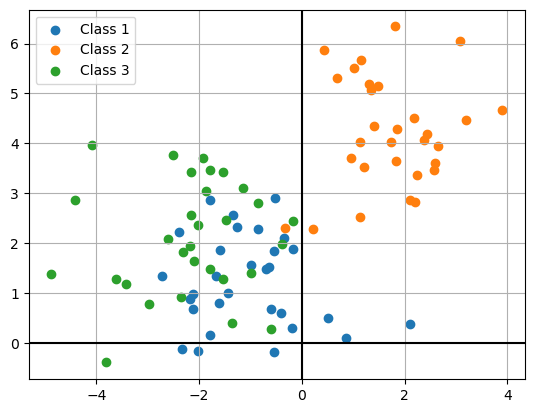

In [5]:
plt.scatter(X1[:, 0], X1[:, 1], label = "Class 1")
plt.scatter(X2[:, 0], X2[:, 1], label = "Class 2")
plt.scatter(X3[:, 0], X3[:, 1], label = "Class 3")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.legend()

# Data described

In [7]:
S1 = np.cov(X1, rowvar=False)
S2 = np.cov(X2, rowvar=False)
S3 = np.cov(X3, rowvar=False)
print("COVARIANCE MATRIXES")
print("Class1")
print(S1)
print("Class 2")
print(S2)
print("Class 3")
print(S3)
S = np.array([S1, S2, S3])

Mu1 = np.average(X1, axis=0)
Mu2 = np.average(X2, axis=0)
Mu3 = np.average(X3, axis=0)
print("\nMEANS")
print("Class1")
print(Mu1)
print("Class 2")
print(Mu2)
print("Class 3")
print(Mu3)

COVARIANCE MATRIXES
Class1
[[ 1.13624407 -0.12681424]
 [-0.12681424  0.84735399]]
Class 2
[[0.86199587 0.12467392]
 [0.12467392 1.22392715]]
Class 3
[[1.37146436 0.09721775]
 [0.09721775 1.28489204]]

MEANS
Class1
[-1.04656322  1.22092043]
Class 2
[1.7290421  4.22531935]
Class 3
[-2.16853092  2.09481466]


# B and W matrixes calculated; Eigenvectors of $W^{-1}B$ matrix calculated

$W = \frac{1}{n-g} \sum_{k=1}^g n_k(n_k-1)\hat{S_k}$

$B = \frac{1}{g-1} \sum_{k=1}^g n_k(\bar{x_k} - \bar{x})(\bar{x_k} - \bar{x})^T$

In [ ]:
sum_W = np.zeros_like(S1)
n_tot = 0
g = len(X)
for i in range(g):
    n_k = len(X[i])
    n_tot += n_k
    sum_W += n_k * (n_k - 1) * S[i]
W = sum_W / (n_tot - g)

sum_B = np.zeros_like(sd1)
mean_tot = np.mean(X, axis=(0, 1))
for i in range(g):
    n_k = len(X[i])
    xk_mean = np.mean(X[i], axis=0)
    sum_B += np.outer(xk_mean - mean_tot, xk_mean - mean_tot) * n_k
B = sum_B / (g - 1)

U = np.linalg.inv(W) @ B
lam, u = np.linalg.eig(U)

idx = lam.argsort()[::-1]
lam = lam[idx]
u = u[:,idx]


# Method's best classification axis shown

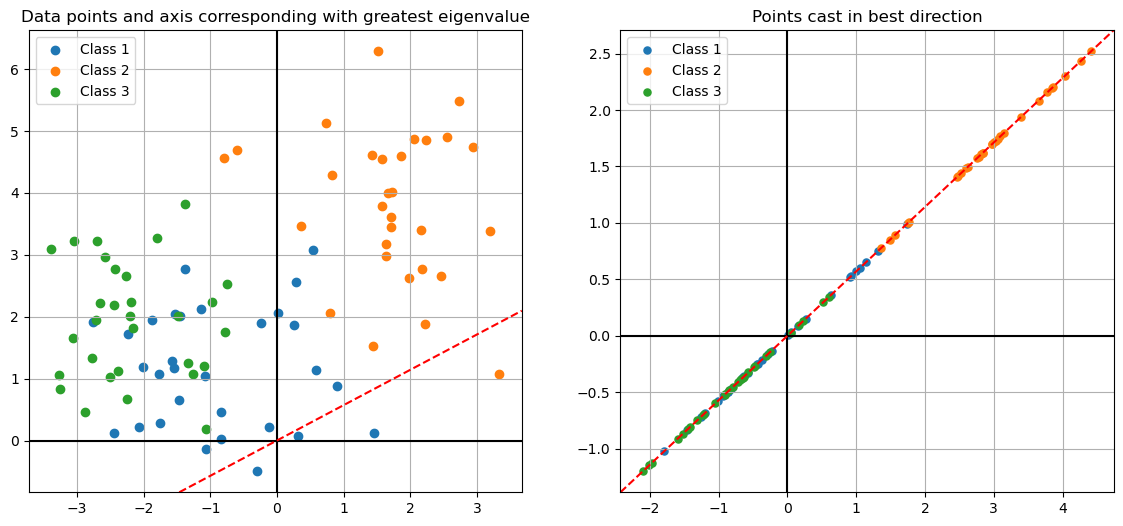

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 6))

# Plot on the left
ax[0].scatter(X1[:, 0], X1[:, 1], label = "Class 1")
ax[0].scatter(X2[:, 0], X2[:, 1], label = "Class 2")
ax[0].scatter(X3[:, 0], X3[:, 1], label = "Class 3")
ax[0].axhline(0, color='black')
ax[0].axvline(0, color='black')
ax[0].axline((0,0), slope = u[1,0]/u[0,0], ls = "--", color="red")
ax[0].set_title("Data points and axis corresponding with greatest eigenvalue")
ax[0].grid()
ax[0].legend()

# Plot on the right
A = u[1,0] / u[0,0]
X1r = (A * X1[:, 1] + X1[:, 0]) / (A**2 + 1)
Y1r = A * X1r
X2r = (A * X2[:, 1] + X2[:, 0]) / (A**2 + 1)
Y2r = A * X2r
X3r = (A * X3[:, 1] + X3[:, 0]) / (A**2 + 1)
Y3r = A * X3r
ax[1].scatter(X1r, Y1r, label = "Class 1", s = 26)
ax[1].scatter(X2r, Y2r, label = "Class 2", s = 26)
ax[1].scatter(X3r, Y3r, label = "Class 3", s = 26)
ax[1].axhline(0, color='black')
ax[1].axvline(0, color='black')
ax[1].axline((0,0), slope = u[1,0]/u[0,0], ls = "--", color="red")
ax[1].set_title("Points cast in best direction")
ax[1].grid()
ax[1].legend()